## k近傍法 (k-NearestNeighbor)

### 分類 (sklearn.neighbors.KNeighborsClassifier)

#### kNN_iris

In [1]:
# irisデータをロード
from sklearn.datasets import load_iris
iris = load_iris()

# データフレーム形式に変換
# カラム名を説明変数に設定
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [2]:
# 目的変数を確認
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
# 目的変数部分だけをデータフレーム形式に変換
iris_target_data = pd.DataFrame(iris.target, columns=['Species'])

print(iris_df)
print(iris_target_data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
     Species
0          0
1          0
2

In [4]:
## データの前処理（の一例）
## 特徴量を抽出/選別 (feature engineering)

# 説明変数ごとに、その変数の意味を踏まえて、必要に応じて Data Cleaning
# >> 目的変数に対する偏りを補正
# >> 非数値であれば何らかのルールに従い数値に変換
# >> 欠損値があれば何らかのルールに従い補充
# >> 規格化、標準化、正規化、など

# 説明変数の次元を圧縮
# >> PCAなど

## iris はそのまま使用して十分な精度が出るようにすでに整えられたデータセット

In [5]:
## データセットの分割（ホールドアウト）
# デフォルトでは 学習用データ部分 ： テストデータ部分 = 3 : 1 に分かれる (test_size=0.25)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris_df, iris_target_data)

In [6]:
# データ型を確認
print("X_train : ", type(X_train), "\n",
      "X_test : ", type(X_test), "\n",
      "Y_train : ", type(Y_train), "\n",
      "Y_train : ", type(Y_train), "\n")

X_train :  <class 'pandas.core.frame.DataFrame'> 
 X_test :  <class 'pandas.core.frame.DataFrame'> 
 Y_train :  <class 'pandas.core.frame.DataFrame'> 
 Y_train :  <class 'pandas.core.frame.DataFrame'> 



In [7]:
# データの中身を見てみる
print(X_train, "\n")
print(X_test, "\n")
print(Y_train, "\n")
print(Y_test)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
61                 5.9               3.0                4.2               1.5
5                  5.4               3.9                1.7               0.4
46                 5.1               3.8                1.6               0.2
127                6.1               3.0                4.9               1.8
25                 5.0               3.0                1.6               0.2
..                 ...               ...                ...               ...
13                 4.3               3.0                1.1               0.1
130                7.4               2.8                6.1               1.9
7                  5.0               3.4                1.5               0.2
62                 6.0               2.2                4.0               1.0
8                  4.4               2.9                1.4               0.2

[112 rows x 4 columns] 

     sepal length (cm)  sepal width (c

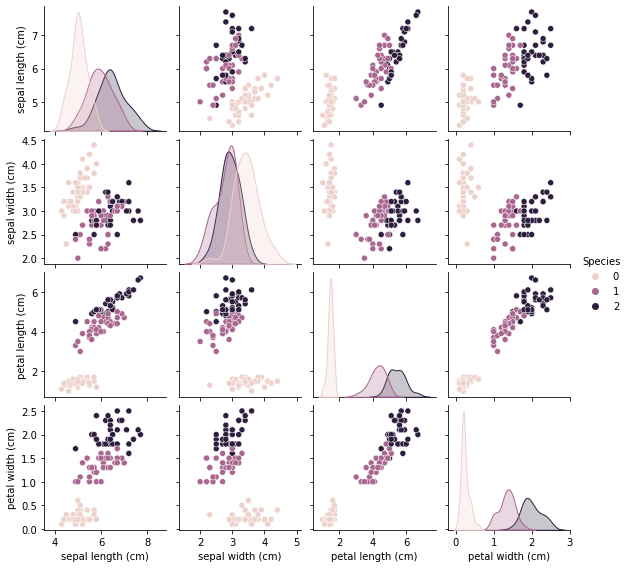

In [8]:
# 分割された様子を図示する

X_df = X_train.copy()
X_df['Species'] = Y_train

import seaborn as sns
sns.pairplot(X_df, hue='Species', height=2)

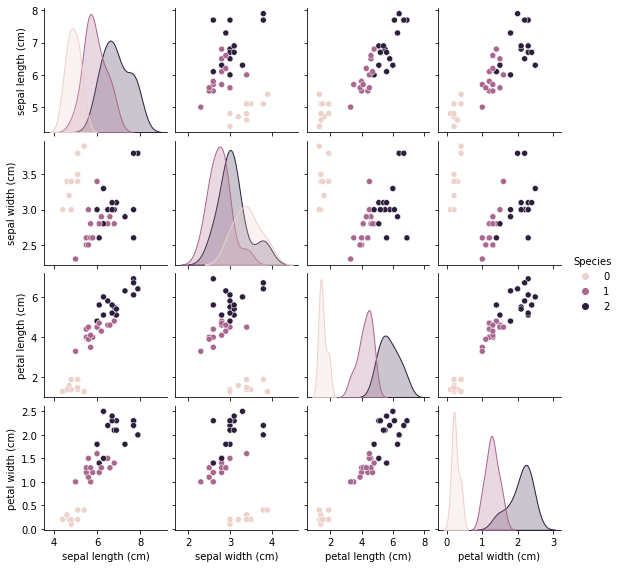

In [9]:
X_df2 = X_test.copy()
X_df2['Species'] = Y_test

#sns.set()
sns.pairplot(X_df2, hue='Species', height=2)

In [10]:
# 目的変数が1次元の場合、scikit-learn は行ベクトル（1d array）を推奨してくる
# なのでデータフレーム形式からnumpy配列へ変換
import numpy as np
Y2_train = np.array(Y_train.Species)
print(Y2_train)

[1 0 0 2 0 1 2 0 0 0 1 2 2 2 0 2 2 0 2 0 0 0 0 2 2 2 0 0 1 0 1 1 0 0 2 0 0
 1 2 1 0 2 2 1 0 1 1 1 1 2 2 0 1 2 1 2 0 1 2 2 0 1 1 0 1 2 1 0 1 1 2 2 0 0
 0 1 0 2 2 2 0 2 1 0 1 0 1 1 1 2 1 0 0 1 1 2 0 2 1 1 0 0 1 2 2 1 2 0 2 0 1
 0]


In [11]:
# k=6 でk近傍法をしてみる
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

# 学習用データのみを与える
knn.fit(X_train, Y2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [12]:
# テスト用データによる予測結果を取得
Y_pred = knn.predict(X_test)

# テスト用データ（正解）に対する予測結果の正答率を計算して表示
from sklearn import metrics
import pandas.testing as tm
print(metrics.accuracy_score(Y_test, Y_pred))

0.9736842105263158


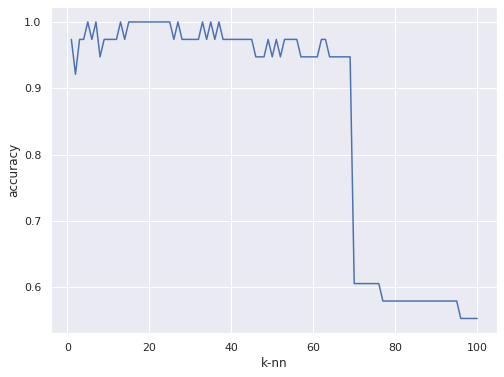

In [13]:
# k の値によって正答率がどう変わるかを図示

# 正答率を保存する入れ物
accuracy_list = []

# k = 1〜100 でk近傍法を行い正答率を取得
k_range = range(1, 101)

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  Y2_train = np.array(Y_train.Species)
  knn.fit(X_train, Y2_train)
  Y_pred = knn.predict(X_test)
  accuracy_list.append(metrics.accuracy_score(Y_test, Y_pred))

# 背景や罫線、目盛りスケールを自動でいい感じにしてくれる
sns.set()

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(k_range, accuracy_list)
plt.xlabel('k-nn')
plt.ylabel('accuracy')
plt.show()

In [14]:
## 交差検証（Cross-validation）
# https://scikit-learn.org/stable/modules/cross_validation.html?highlight=stratifiedshufflesplit

# 学習用データ/テスト用データ の分割を網羅的に行う
# 上記の分割のそれぞれにおいて、学習用データをさらに訓練データ/検証データへ網羅的に分割し、比較/統合することで予測精度を高める

# k近傍法の場合、ハイパーパラメータである k を、もっとも精度が高くなるようにしたい

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

In [16]:
# 学習用データ/テスト用データ の分割
# 学習用 : テスト用 = 120 : 30
sss1 = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# 学習用データをさらに訓練データ/検証データへ網羅的に分割
# 訓練用 : 検証用 = 100 : 20
sss2 = StratifiedShuffleSplit(n_splits=6, test_size=20, random_state=0)

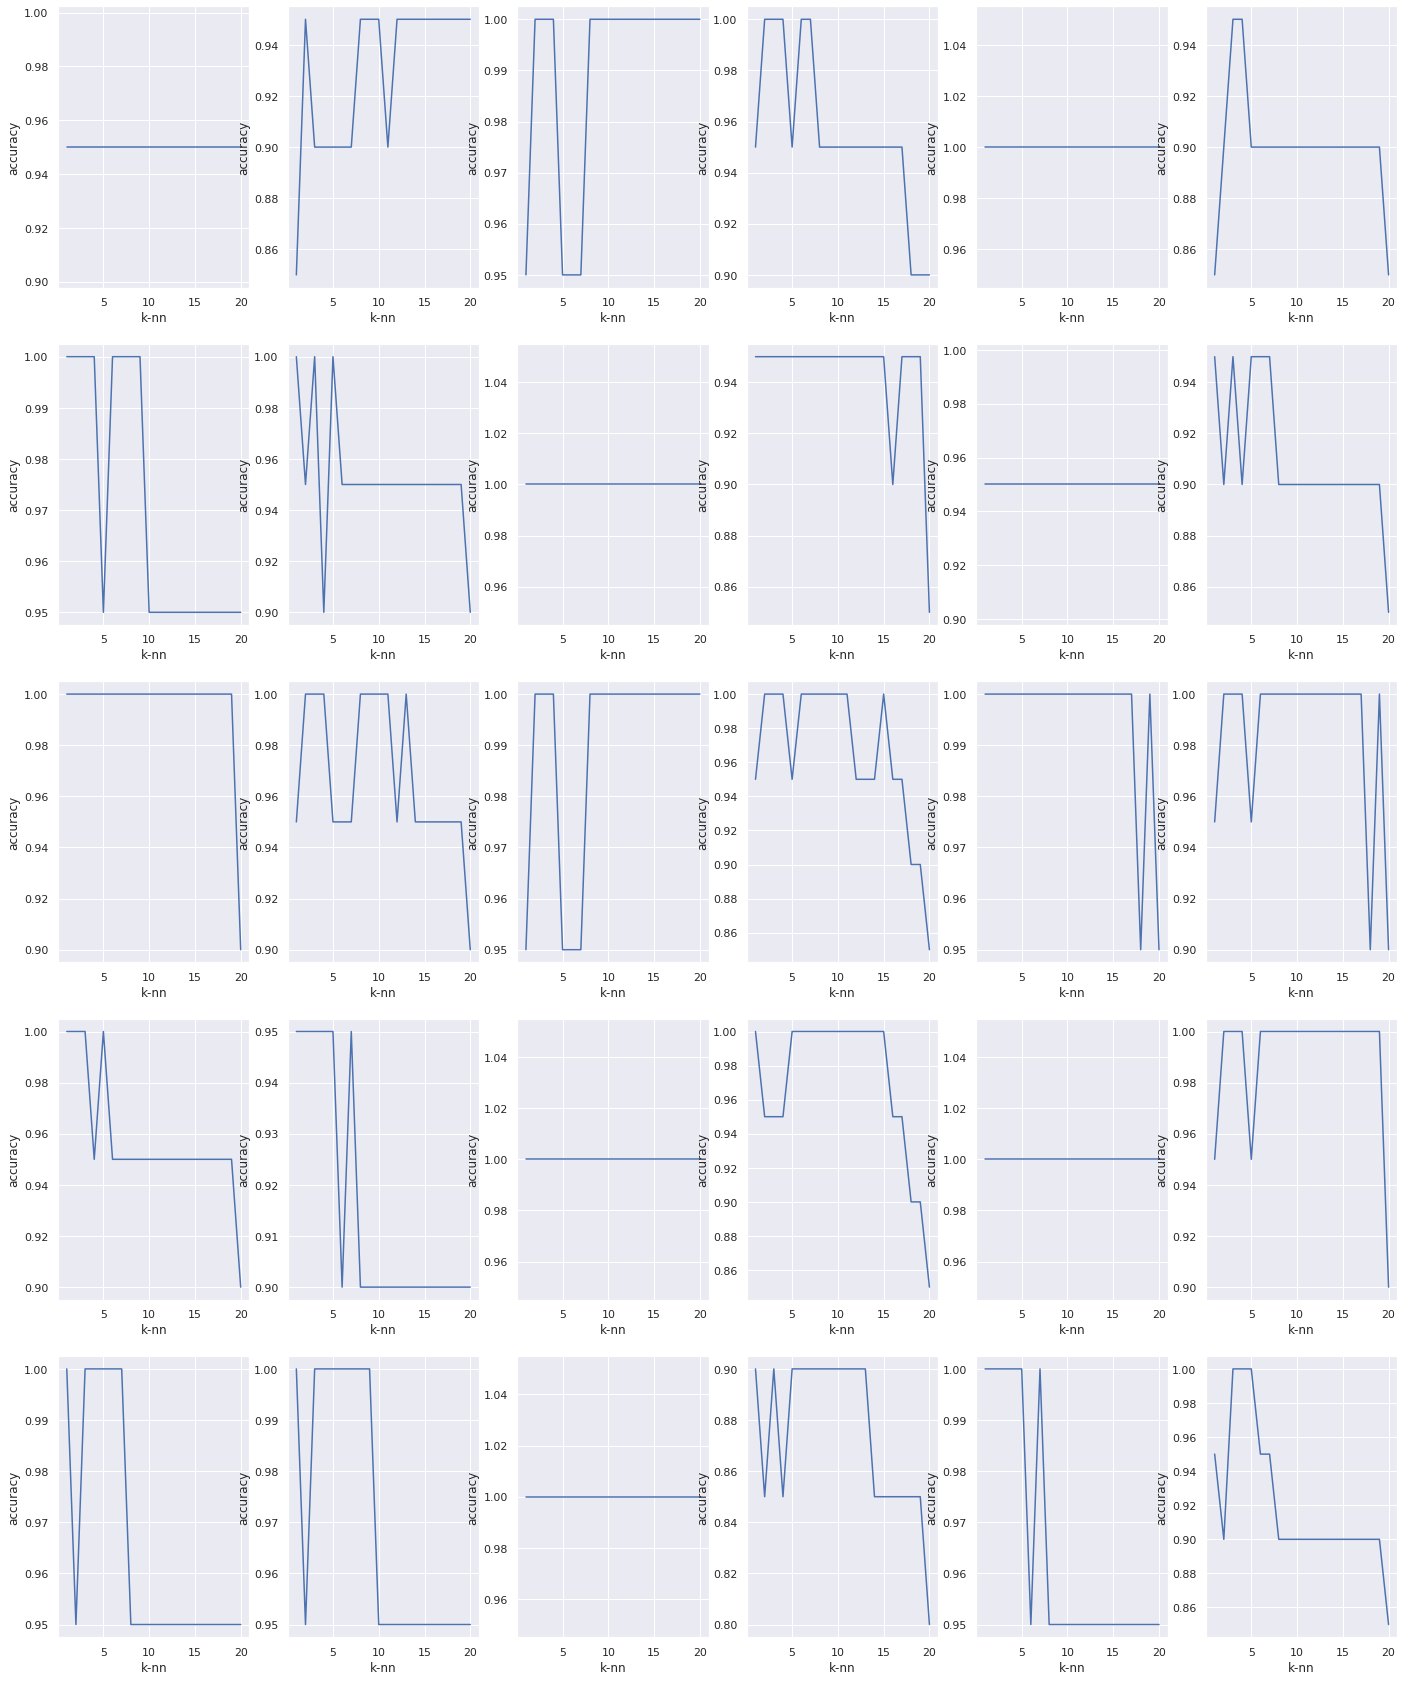

In [17]:
i = 1
plt.figure(figsize=(24, 30))

for train_index1, test_index1 in sss1.split(iris_df, iris_target_data):
  #print("TRAIN:", train_index1, "\n TEST:", test_index1, "\n")
  X_learn, X_test = iris_df.loc[train_index1], iris_df.loc[test_index1]
  y_learn, y_test = iris_target_data.loc[train_index1], iris_target_data.loc[test_index1]

  for train_index2, test_index2 in sss2.split(X_learn, y_learn):
    X_train, X_verify = iris_df.loc[train_index2], iris_df.loc[test_index2]
    y_train, y_verify = iris_target_data.loc[train_index2], iris_target_data.loc[test_index2]

    # 正答率を保存する入れ物
    accuracy_list = []

    # k = 1〜20 でk近傍法を行い正答率を取得
    k_range = range(1, 21)

    for k in k_range:
      knn = KNeighborsClassifier(n_neighbors=k)
      y2_train = np.array(y_train.Species)
      knn.fit(X_train, y2_train)
      y_pred = knn.predict(X_verify)
      # 網羅的に分割した1つの場合における、訓練用データを学習に使用し検証用データで正答率を算出
      accuracy_list.append(metrics.accuracy_score(y_verify, y_pred))

    # 背景や罫線、目盛りスケールを自動でいい感じにしてくれる
    sns.set()

    plt.subplot(5,6,i)
    plt.plot(k_range, accuracy_list)
    #plt.title(("TRAIN : ", train_index, " TEST : ", test_index))
    plt.xlabel('k-nn')
    plt.ylabel('accuracy')
    i += 1

plt.show()

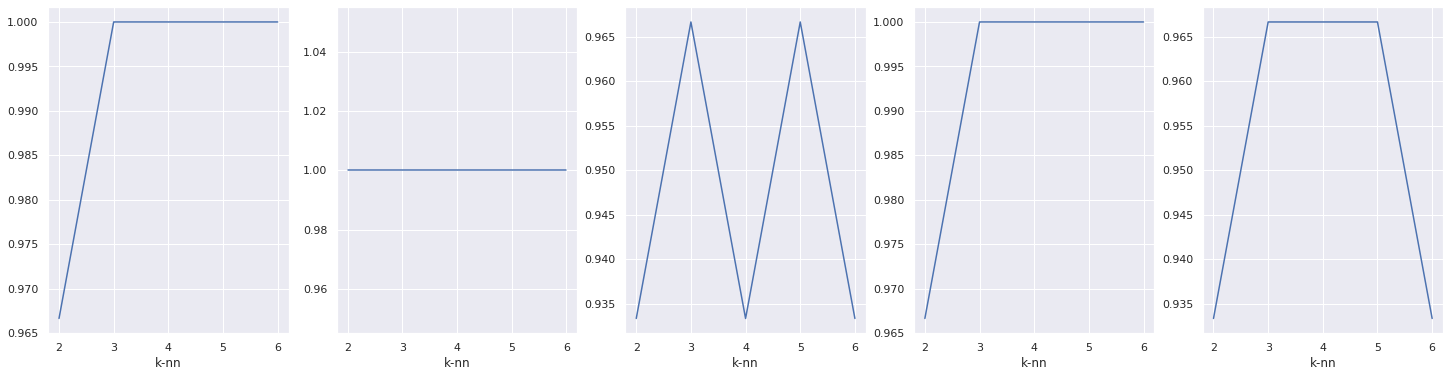

In [18]:
## k=3,4,5 が候補か。。。
# 学習用/テスト用に網羅的に分割した各場合において、学習用データで学習しテスト用データで正答率を算出

i = 1
plt.figure(figsize=(25, 6))

for train_index, test_index in sss1.split(iris_df, iris_target_data):
  #print("TRAIN:", train_index1, "\n TEST:", test_index1, "\n")
  X_learn, X_test = iris_df.loc[train_index], iris_df.loc[test_index]
  y_learn, y_test = iris_target_data.loc[train_index], iris_target_data.loc[test_index]

  # 正答率を保存する入れ物
  accuracy_list = []

  # k = 2〜6 でk近傍法を行い正答率を取得
  k_range = range(2, 7)

  for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    y2_learn = np.array(y_learn.Species)
    knn.fit(X_learn, y2_learn)
    y_pred = knn.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(y_test, y_pred))

  # 背景や罫線、目盛りスケールを自動でいい感じにしてくれる
  sns.set()

  plt.subplot(1,5,i)
  plt.plot(k_range, accuracy_list)
  #plt.title(("TRAIN : ", train_index, " TEST : ", test_index))
  plt.xlabel('k-nn')
  #plt.ylabel('accuracy')
  i += 1

plt.show()

In [19]:
## k = 3 or 5 とするのがもっとも予測精度が高い
# しかしあくまで手元にある150個のデータに対して、の話
# 全く未知の iris のデータに対する予測精度（汎化性能）は、やってみないと誰にもわからない